<a href="https://colab.research.google.com/github/SantiagoGutierrez008/MIAD_MD_ETL/blob/main/Ataques_al_corazo%CC%81n_Proyecto_del_Curso_IML_MIAD_VF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> Entraga 1 - Proyecto del Curso </center>
# <center> Machine Learning para Identificar Riesgos de Ataques al Corazón </center>

En este proyecto pondrán poner en práctica la identificación e implementación de modelos predictivos pertinentes para resolver una situación problemática asociada a un conjunto de datos reales de su elección, basándose en las ventajas y limitaciones, y la comunicación del producto de dichos modelos. De esta manera, deberán utilizar los conceptos aprendidos en el curso para solucionar la situación problema que hayan seleccionado.

## 1. Formulación de una pregunta de interés enmarcada en el negocio.
**Se define el contexto organizacional donde toman lugar los datos del proyecto y se establece de manera clara y precisa la pregunta de interés que se espera solucionar con el uso de modelos predictivos.**


Las enfermedades cardiovasculares son la principal causa de muerte a nivel mundial, se estima que al año mueren alrededor de 17.9 millones de personas (OMS). La mayoría de estas muertes ocurren en países de ingresos medianos y bajos. Estas enfermedades son trastornos del corazón y vasos sanguíneos, de esta manera se relacióna con el hecho de que el corazón no bombea la suficiente sangre para el cuerpo y esto puede probocar ataques cardíacos, enfermedades cerebrovasculares, insuficiencia cardíaca, entre otras.

De acuerdo con la Organización Mundial de la Salud, las enfermedades cardiovasculares estan relacionadas con el hecho de que una persona padezca de hipertensión arterial, diabetes, colesterol alto, obesidad, o incluso por la falta de actividad física y el consumo excesivo de alcohol y tabaco. Se estima que la exposición a productos derivados del tabaco es responsable del 10% de todas las muertes ocasionadas por enfermedades cardiovasculares (Organización Panamericana de Salud).  

Dado el significativo rol del corazón como un órgano vital, anticipar la insuficiencia cardíaca se ha vuelto una prioridad para profesionales médicos; sin embargo, hasta el momento, predecir eventos asociados con esta condición en la práctica clínica suele no alcanzar niveles de precisión satisfactorios dado que sólo se logra una precisión modesta con una interpretabilidad limitada de las variables predictivas.

Teniendo en cuenta lo anterior, se analiza un conjunto de datos que contiene los registros médicos de 299 pacientes con insuficiencia cardíaca recopilados en el Instituto de Cardiología de Faisalabad y en el Hospital Allied de Faisalabad (Punjab, Pakistán), entre abril y diciembre de 2015 (Ahmad et al., 2018). A partir de los datos, se busca responder a la pregunta: ¿Qué pacientes necesitan un mayor manejo al identificar los factores de mayor riesgo que puedan ser indicio de una muerte por un ataque al corazón?. Al identificar los factores de mayor riesgo se pueden generar estrategias de detección temprana para un manejo oportuno de pacientes con mayor probabilidad de sufrir una muerte por un ataque al corazón.

## 2. Exploración de los datos para su entendimiento dentro del contexto organizacional.
**Se utilizan histogramas, correlogramas y estadísticas descriptivas para la exploración preliminar de los datos del problema, para dejar claro el rol que cumple cada una de las variables a utilizar dentro del contexto organizacional en cuestión. Además, se argumenta la razón por la que el uso de estas variables puede contribuir a la solución del problema por medio de modelos predictivos.**

### 2.1 Cargue

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#datos = pd.read_csv('HFCR_data.csv')
datos = pd.read_csv('heart_failure_clinical_records_dataset.csv')
print("La dimensión de los datos es: " + str(datos.shape))
datos.head(5)

La dimensión de los datos es: (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Este conjunto de datos contiene los registros médicos de **299 pacientes** con insuficiencia cardíaca. El conjunto de datos contiene **13 variables**, que brindan información clínica, corporal y de estilo de vida que se describiran brevemente en el siguiente apartado.

Es imperante anotar que los 299 pacientes tenían disfunción sistólica del ventrículo izquierdo y tenían insuficiencia cardíaca previa que los ubicaba en las clases III o IV de la clasificación de etapas de insuficiencia cardíaca de la New York Heart Association (Bredy et. al., 2017). En este sentido, el ejercicio apunta a responder la pregunta para aquellos pacientes que cumplen estas condiciones, no para aquellos que se encuentran en condiciones normales.

### 2.2 Descripción

* **age:** La edad es un factor de riesgo significativo para enfermedades cardiovasculares. A medida que las personas envejecen, su riesgo de sufrir ataques cardíacos aumenta debido a cambios en el corazón y los vasos sanguíneos, incluyendo el endurecimiento de las arterias (aterosclerosis). Edad del paciente. **Numérica**
* **anemia:**  La anemia puede afectar la cantidad de oxígeno que la sangre puede llevar al corazón. Si el corazón no recibe suficiente oxígeno, esto puede aumentar el riesgo de ataques cardíacos. Además, la anemia puede ser un indicador de otras condiciones subyacentes que también podrían aumentar el riesgo de enfermedades cardíacas. Indica si el paciente presenta disminución de glóbulos rojos o hemoglobina, tomando el valor 1 si la tiene y 0 si no la tiene. **Booleano**
* **creatinine phosphokinase:**	Los niveles elevados de CPK en la sangre de un paciente podrían indicar insuficiencia cardíaca o lesión. Esta variable indica el nivel de la enzima CPK en la sangre (mcg/L). **Numérica**
* **diabetes:** La diabetes es un factor de riesgo conocido para enfermedades cardiovasculares. Afecta la capacidad del cuerpo para utilizar la glucosa en la sangre, lo que puede llevar a daños en los vasos sanguíneos y el corazón, aumentando el riesgo de ataques cardíacos. Indica si el paciente tiene o no diabetes, tomando el valor 1 si la tiene y 0 si no la tiene. **Booleano**
* **ejection_fraction:** Es un indicador crucial de la función cardíaca que mide el porcentaje de sangre que se bombea fuera del ventrículo izquierdo del corazón con cada latido. Una fracción de eyección anormalmente baja puede ser un signo de insuficiencia cardíaca y está asociada con un mayor riesgo de eventos cardiovasculares adversos, incluidos los ataques cardíacos. Esta variable es el porcentaje de sangre que sale del corazón en cada contracción. **Numérica**
* **high_blood_pressure:** La hipertensión es un factor de riesgo principal para el desarrollo de enfermedades cardíacas. Puede dañar las arterias, reduciendo el flujo sanguíneo al corazón y promoviendo la aterosclerosis, lo que aumenta significativamente el riesgo de ataques al corazón. Indica si el paciente tiene Hipertensión, tomando el valor 1 si la tiene y 0 si no la tiene. **Booleano**
* **platelets:** El número de plaquetas en la sangre puede influir en la coagulación, y tanto un número excesivamente alto como uno bajo pueden indicar o contribuir a problemas cardiovasculares. Las plaquetas altas pueden aumentar el riesgo de coágulos sanguíneos, mientras que las bajas pueden indicar sangrado o condiciones que afectan la capacidad de coagulación de la sangre. Número de plaquetas en la sangre (kiloplatelets/mL) representada como un número decimal. **Numérica**
* **serum_creatinine:**	La creatinina sérica es un producto de desecho generado por la creatina cuando un músculo se descompone. Especialmente, los médicos se centran en la creatinina sérica en sangre para comprobar la función renal. Si un paciente tiene niveles elevados de creatinina sérica, puede indicar disfunción renal. Esta variable indica el nivel de creatinina en suero en la sangre (mg/dL) representada por un número decimal. **Numérica**
* **serum_sodium:** El sodio es un mineral que sirve para el correcto funcionamiento de músculos y nervios. La prueba de sodio sérico es un examen de sangre de rutina que indica si un paciente tiene niveles normales de sodio en la sangre. Un nivel anormalmente bajo de sodio en la sangre podría deberse a una insuficiencia cardíaca. Esta variable indidica el nivel de sodio en sangre representada por un número entero. **Numérica**
* **sex:** Existen diferencias significativas en el riesgo de enfermedades cardíacas entre hombres y mujeres, incluyendo cómo se manifiestan los síntomas y la probabilidad de sufrir ciertos tipos de enfermedades cardiovasculares. Variable de tipo binario que toma el valor de 1 si el paciente es hombre y 0 si es mujer. **Booleano**
* **smoking:** Fumar es un factor de riesgo bien establecido para enfermedades cardiovasculares. Los componentes del humo del tabaco pueden dañar el revestimiento de los vasos sanguíneos, aumentar la acumulación de placa y reducir el oxígeno en la sangre, lo que aumenta el riesgo de ataques cardíacos. Indica si el paciente fuma, tomando el valor 1 si fuma y 0 si no. **Booleano**
* **time:**	El tiempo de seguimiento puede proporcionar información valiosa sobre la progresión de las condiciones de salud y la eficacia de cualquier tratamiento o cambio en el estilo de vida realizado. También puede ayudar a identificar períodos críticos en los que los pacientes pueden estar en mayor riesgo. La cantidad de dias que estuvo en seguimiento.**Numérica**
* **DEATH EVENT:** La característica del evento de muerte, que utilizaremos como la variable objetivo en nuestro ejercicio, indica si el paciente murió o sobrevivió durante el periodo de seguimiento, tomando el valor 1 de si murio y 0 si no. **Booleano**

### 2.3 Analisis descriptivo

In [ ]:
## Identificación de datos nulos o faltantes
for col in datos.columns:
    num_missing = datos[col].isnull().sum()
    pct_missing = np.mean(datos[col].isnull())
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

age - 0.0% - 0
anaemia - 0.0% - 0
creatinine_phosphokinase - 0.0% - 0
diabetes - 0.0% - 0
ejection_fraction - 0.0% - 0
high_blood_pressure - 0.0% - 0
platelets - 0.0% - 0
serum_creatinine - 0.0% - 0
serum_sodium - 0.0% - 0
sex - 0.0% - 0
smoking - 0.0% - 0
time - 0.0% - 0
DEATH_EVENT - 0.0% - 0


No se presentan datos nulos ni faltantes en ninguna de las variables

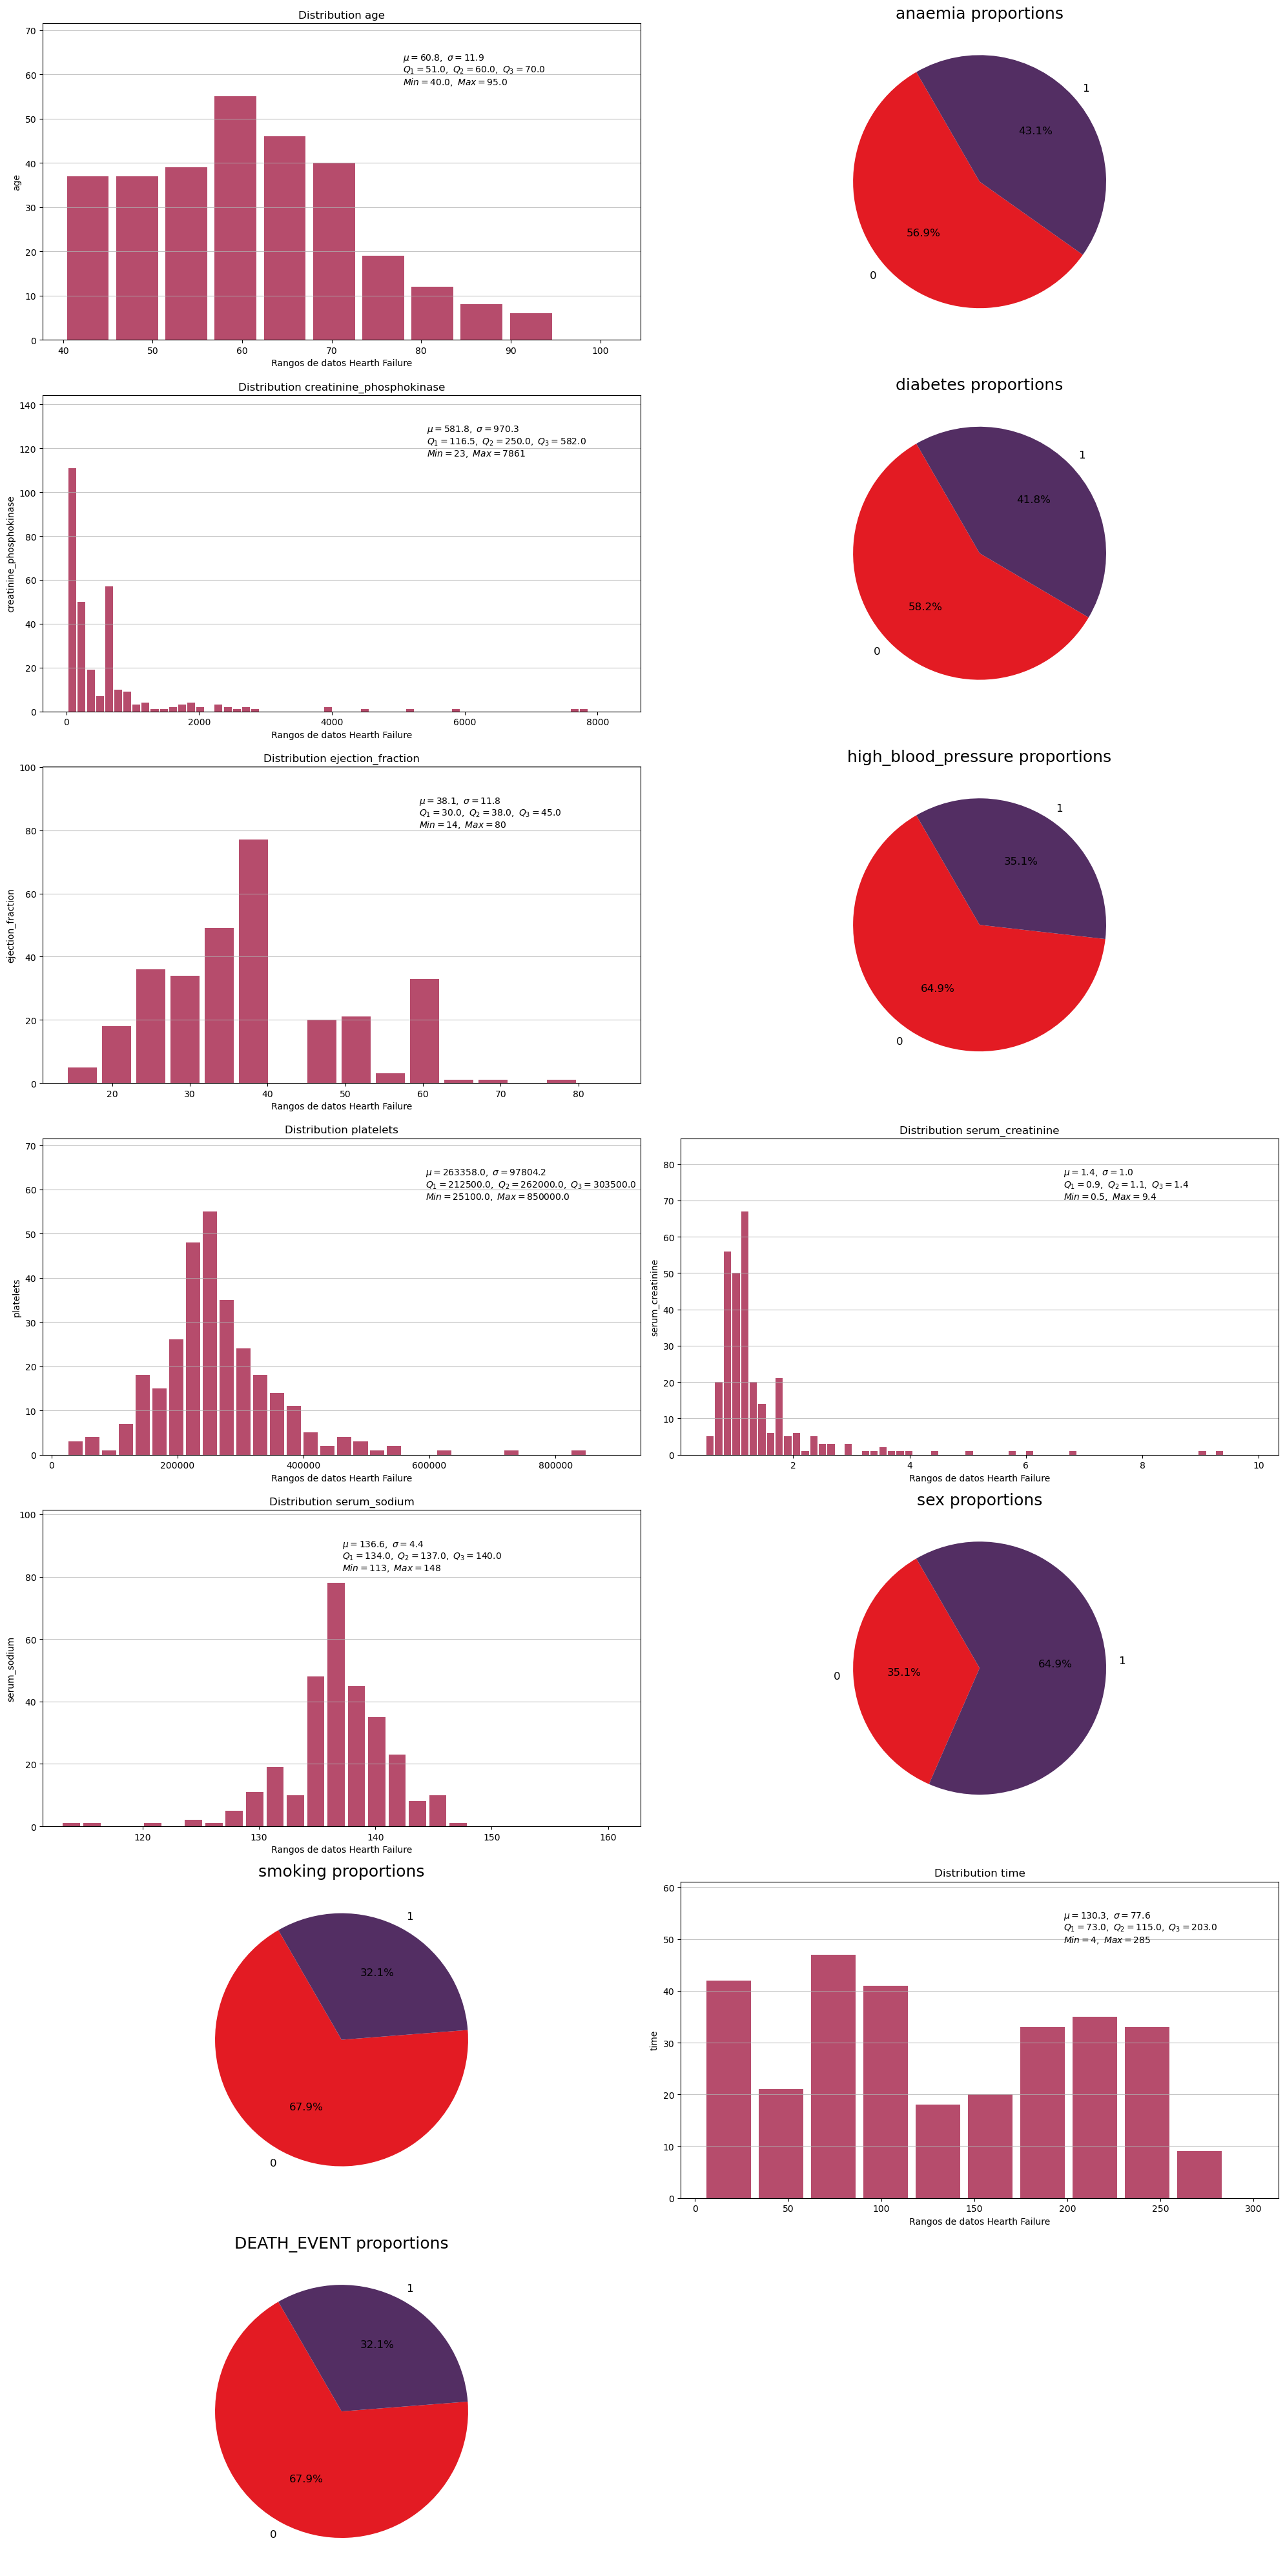

In [ ]:
## Histogramas y analisis descriptivo

def descriptive():
    plt.figure(figsize=(20,40))
    for i, var in enumerate(datos.columns):
        plt.subplot(7,2,i+1)
        if len(datos[var].unique()) > 3:
            dataHist = datos[var]
            n, bins, patches = plt.hist(x=dataHist, bins='auto', color='#98002E',alpha=0.7, rwidth=0.85)
            maxfreq = n.max()
            maxval = dataHist.min() + (dataHist.max() - dataHist.min())*0.69
            plt.grid(axis='y', alpha=0.75)
            plt.xlabel('Rangos de datos Hearth Failure')
            plt.ylabel(f'{var}')
            plt.title(f'Distribution {var}')
            plt.text(maxval, maxfreq * 1.15, f'$\mu={round(dataHist.mean(),1)},$ $\sigma={round(dataHist.std(),1)}$')
            plt.text(maxval, maxfreq * 1.1, f'$Q_1={round(dataHist.quantile(q=0.25),1)},$ $Q_2={round(dataHist.quantile(q=0.5),1)},$ $Q_3={round(dataHist.quantile(q=0.75),1)}$')
            plt.text(maxval, maxfreq * 1.05, f'$Min={round(dataHist.min(),1)},$ $Max={round(dataHist.max(),1)}$')
            plt.ylim(ymax= maxfreq*1.3)
            plt.xlim(xmax= dataHist.max() * 1.1)
        else:
            data = datos.groupby(var).size()
            labels = data.keys()
            colors = ['#E31B23', '#532E63']
            plt.pie(x=data, autopct= "%.1f%%", labels=labels, pctdistance= 0.6, startangle=120, textprops={'fontsize':12}, colors = colors)
            plt.title((f"{var} proportions").format(var), fontsize = 18)
        plt.tight_layout()
    plt.show()
descriptive()

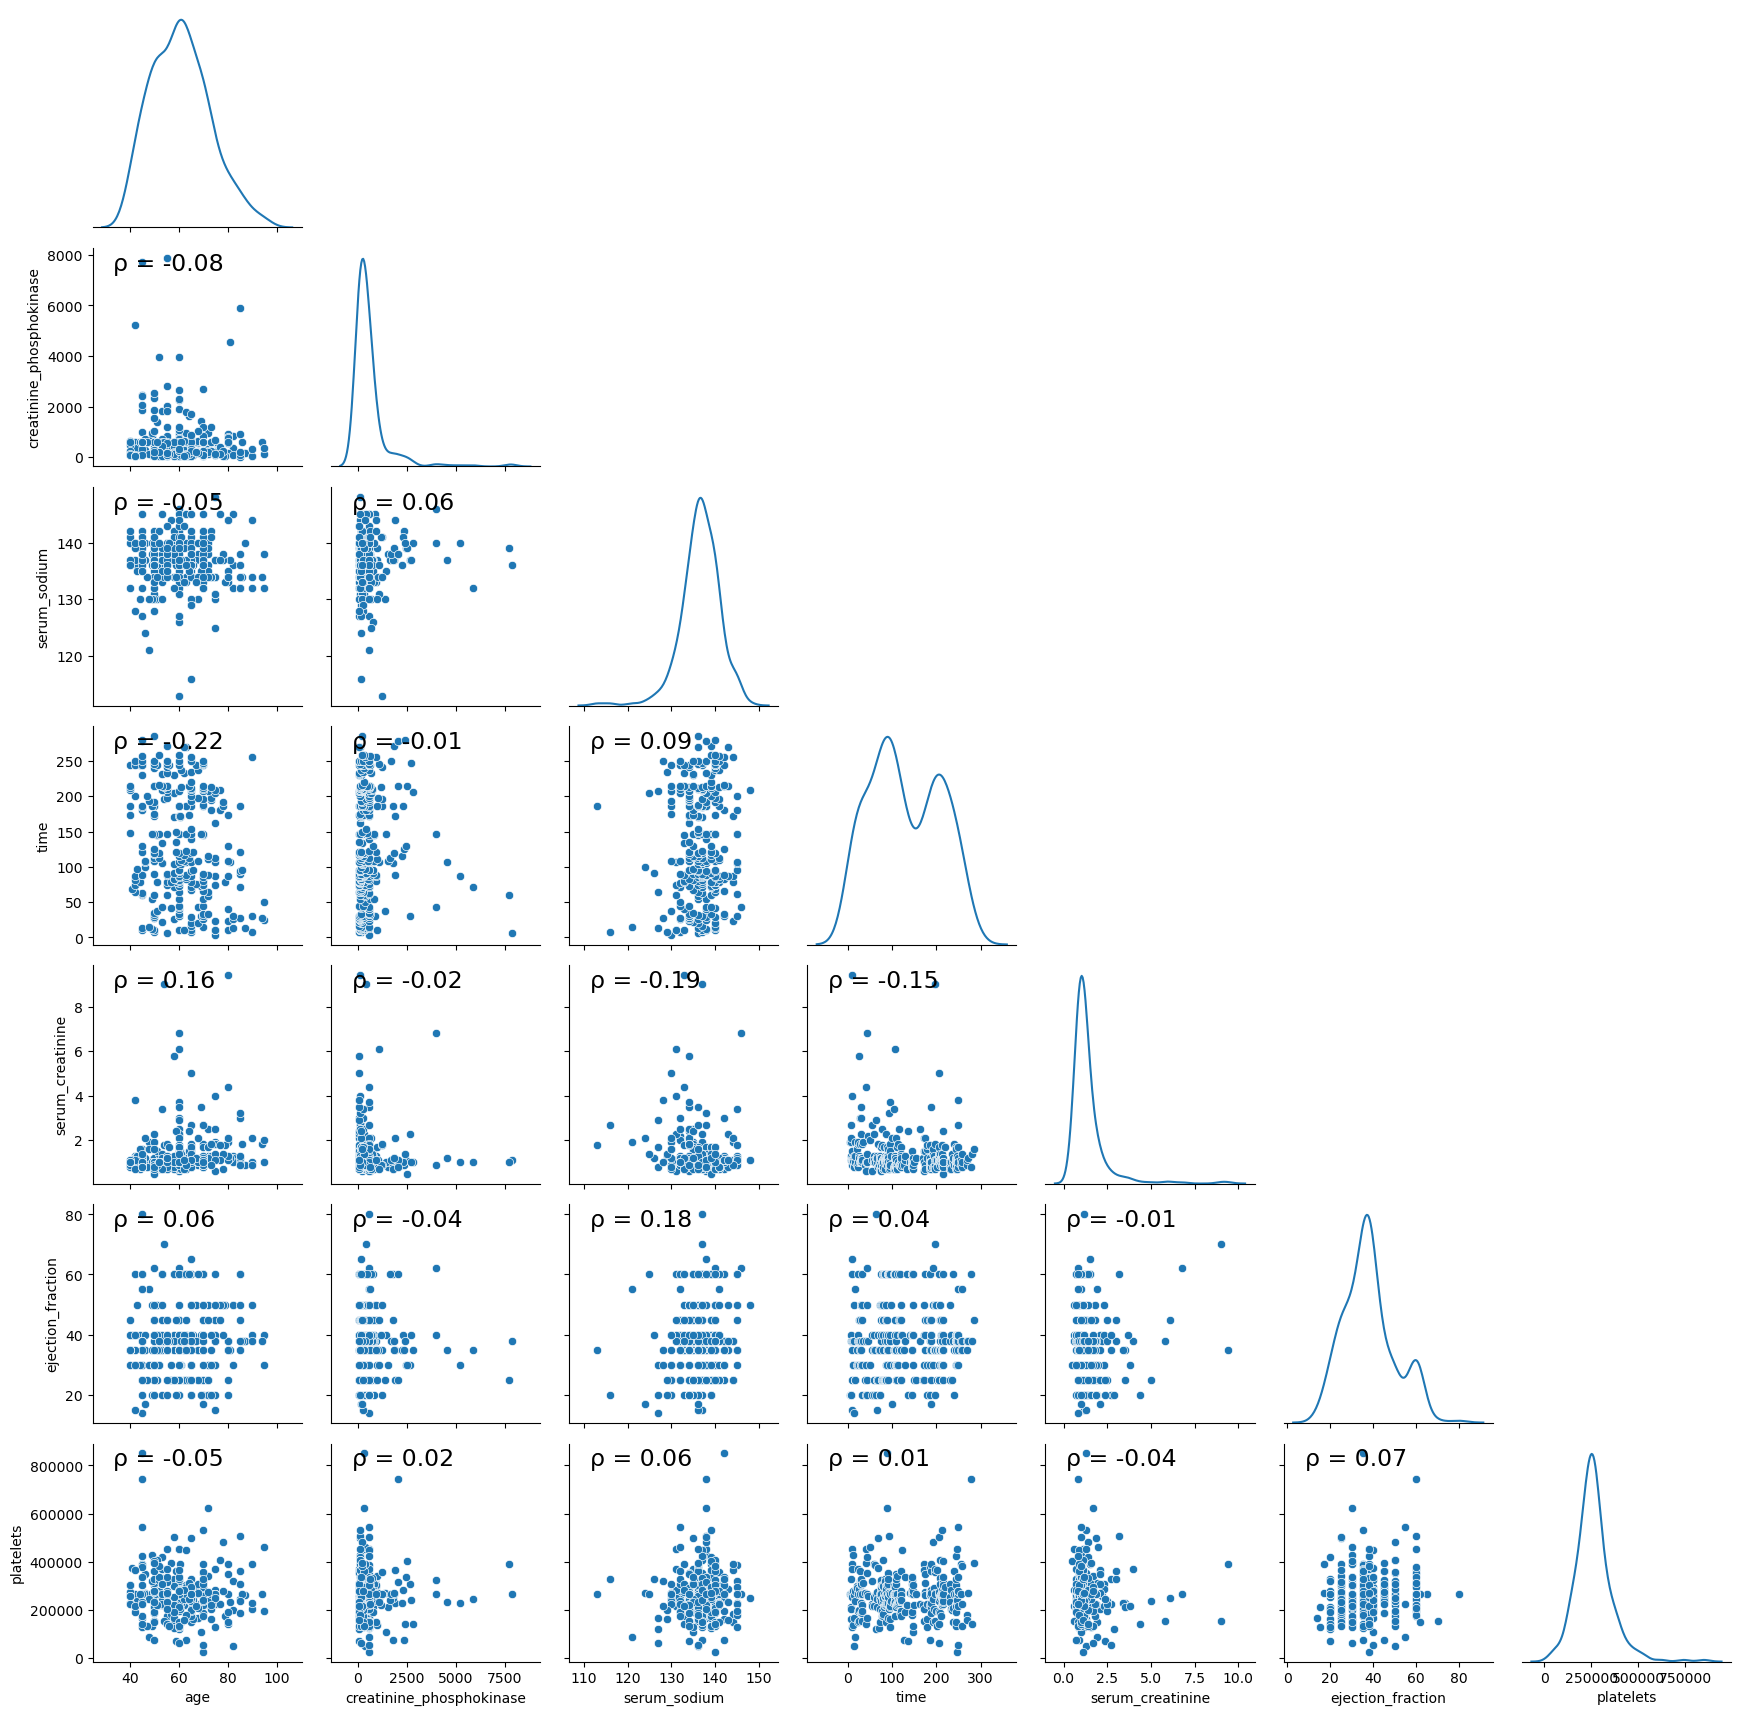

In [ ]:
## Diagrama de correlación
from scipy.stats import pearsonr
import seaborn as sns

cats = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
cont = list(set(datos.columns) - set(cats))
## Correlogramas
def corrfunc(x, y, ax=None, **kws):
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes, fontsize= 17)
g = sns.PairGrid(datos[cont], diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(corrfunc)

In [ ]:
c = datos.select_dtypes('int').corr().abs()
s = c.unstack()
so = s[s < 1].sort_values(kind="quicksort", ascending=False)
so[::2]

DEATH_EVENT               time                        0.526964
smoking                   sex                         0.445892
ejection_fraction         DEATH_EVENT                 0.268603
time                      high_blood_pressure         0.196439
DEATH_EVENT               serum_sodium                0.195204
anaemia                   creatinine_phosphokinase    0.190741
ejection_fraction         serum_sodium                0.175902
sex                       diabetes                    0.157730
                          ejection_fraction           0.148386
smoking                   diabetes                    0.147173
anaemia                   time                        0.141414
smoking                   anaemia                     0.107290
sex                       high_blood_pressure         0.104615
anaemia                   sex                         0.094769
diabetes                  serum_sodium                0.089551
serum_sodium              time                        0

Identificamos que el rango de edad de los paciente esta entre 40 a los 95 años, la media de edad de los pacientes es de 61 años. Se cuenta con un porcentaje total de hombres del 64.9% y de mujeres del 35.1%. Del total, el 32.1% de  pacientes son fumadores, el resto no lo son. Adicionalmente, el 43% de los pacientes presenta anemia y un 42 % presenta diabetes. Por otro lado, la proporción de personas hipertensas es del 35.1%.

La CPK presenta una distribución asimetrica con sesgo a la izquierda y cola a la derecha. La mayoria de datos de esta variable esta entre el Q1 y el Q3, que equivalen a 116 y 582 mcg/L respectivamente. El rango de los datos esta entre 23 y 7861 mcg/L, y presenta una media de 581 mcg/L. La creatina serica tiene tambien una distribución asimetrica con sesgo a la izquierda y outliers positivos.

La fracción de ejección presenta una distribución bimodal con un minimo de 14 % y un maximo de 80 % de sangre que sale del corazón en cada contracción.

El numero de plaquetas se aproxima a una distribución normal con una media 263358 kiloplatelets/mL  y una desviación de 97804 kiloplatelets/mL. El sodio tambien se aproxima a una distribución normal con media de 136 y una desviación de 4.4. Por otro lado, el tiempo de seguimiento sigue una distribución bimodal con una media de 130.3 dias y un rango entre los 4 y 285 dias.

Por último, del total de eventos de muerte el 32.1% de los pacientes murieron a causa de una insuficiencia cardiaca.

Teniendo en cuenta los correlogramos se identifica que no existe una correlación lineal entre las variables predictoras. Por lo que podemos decir que no hay información redundante dentro de las variables. Sin embargo, se encuentra que las variables tiempo y lso eventos de meurte tienen una leve relación, presentando una correlación de 0.52.

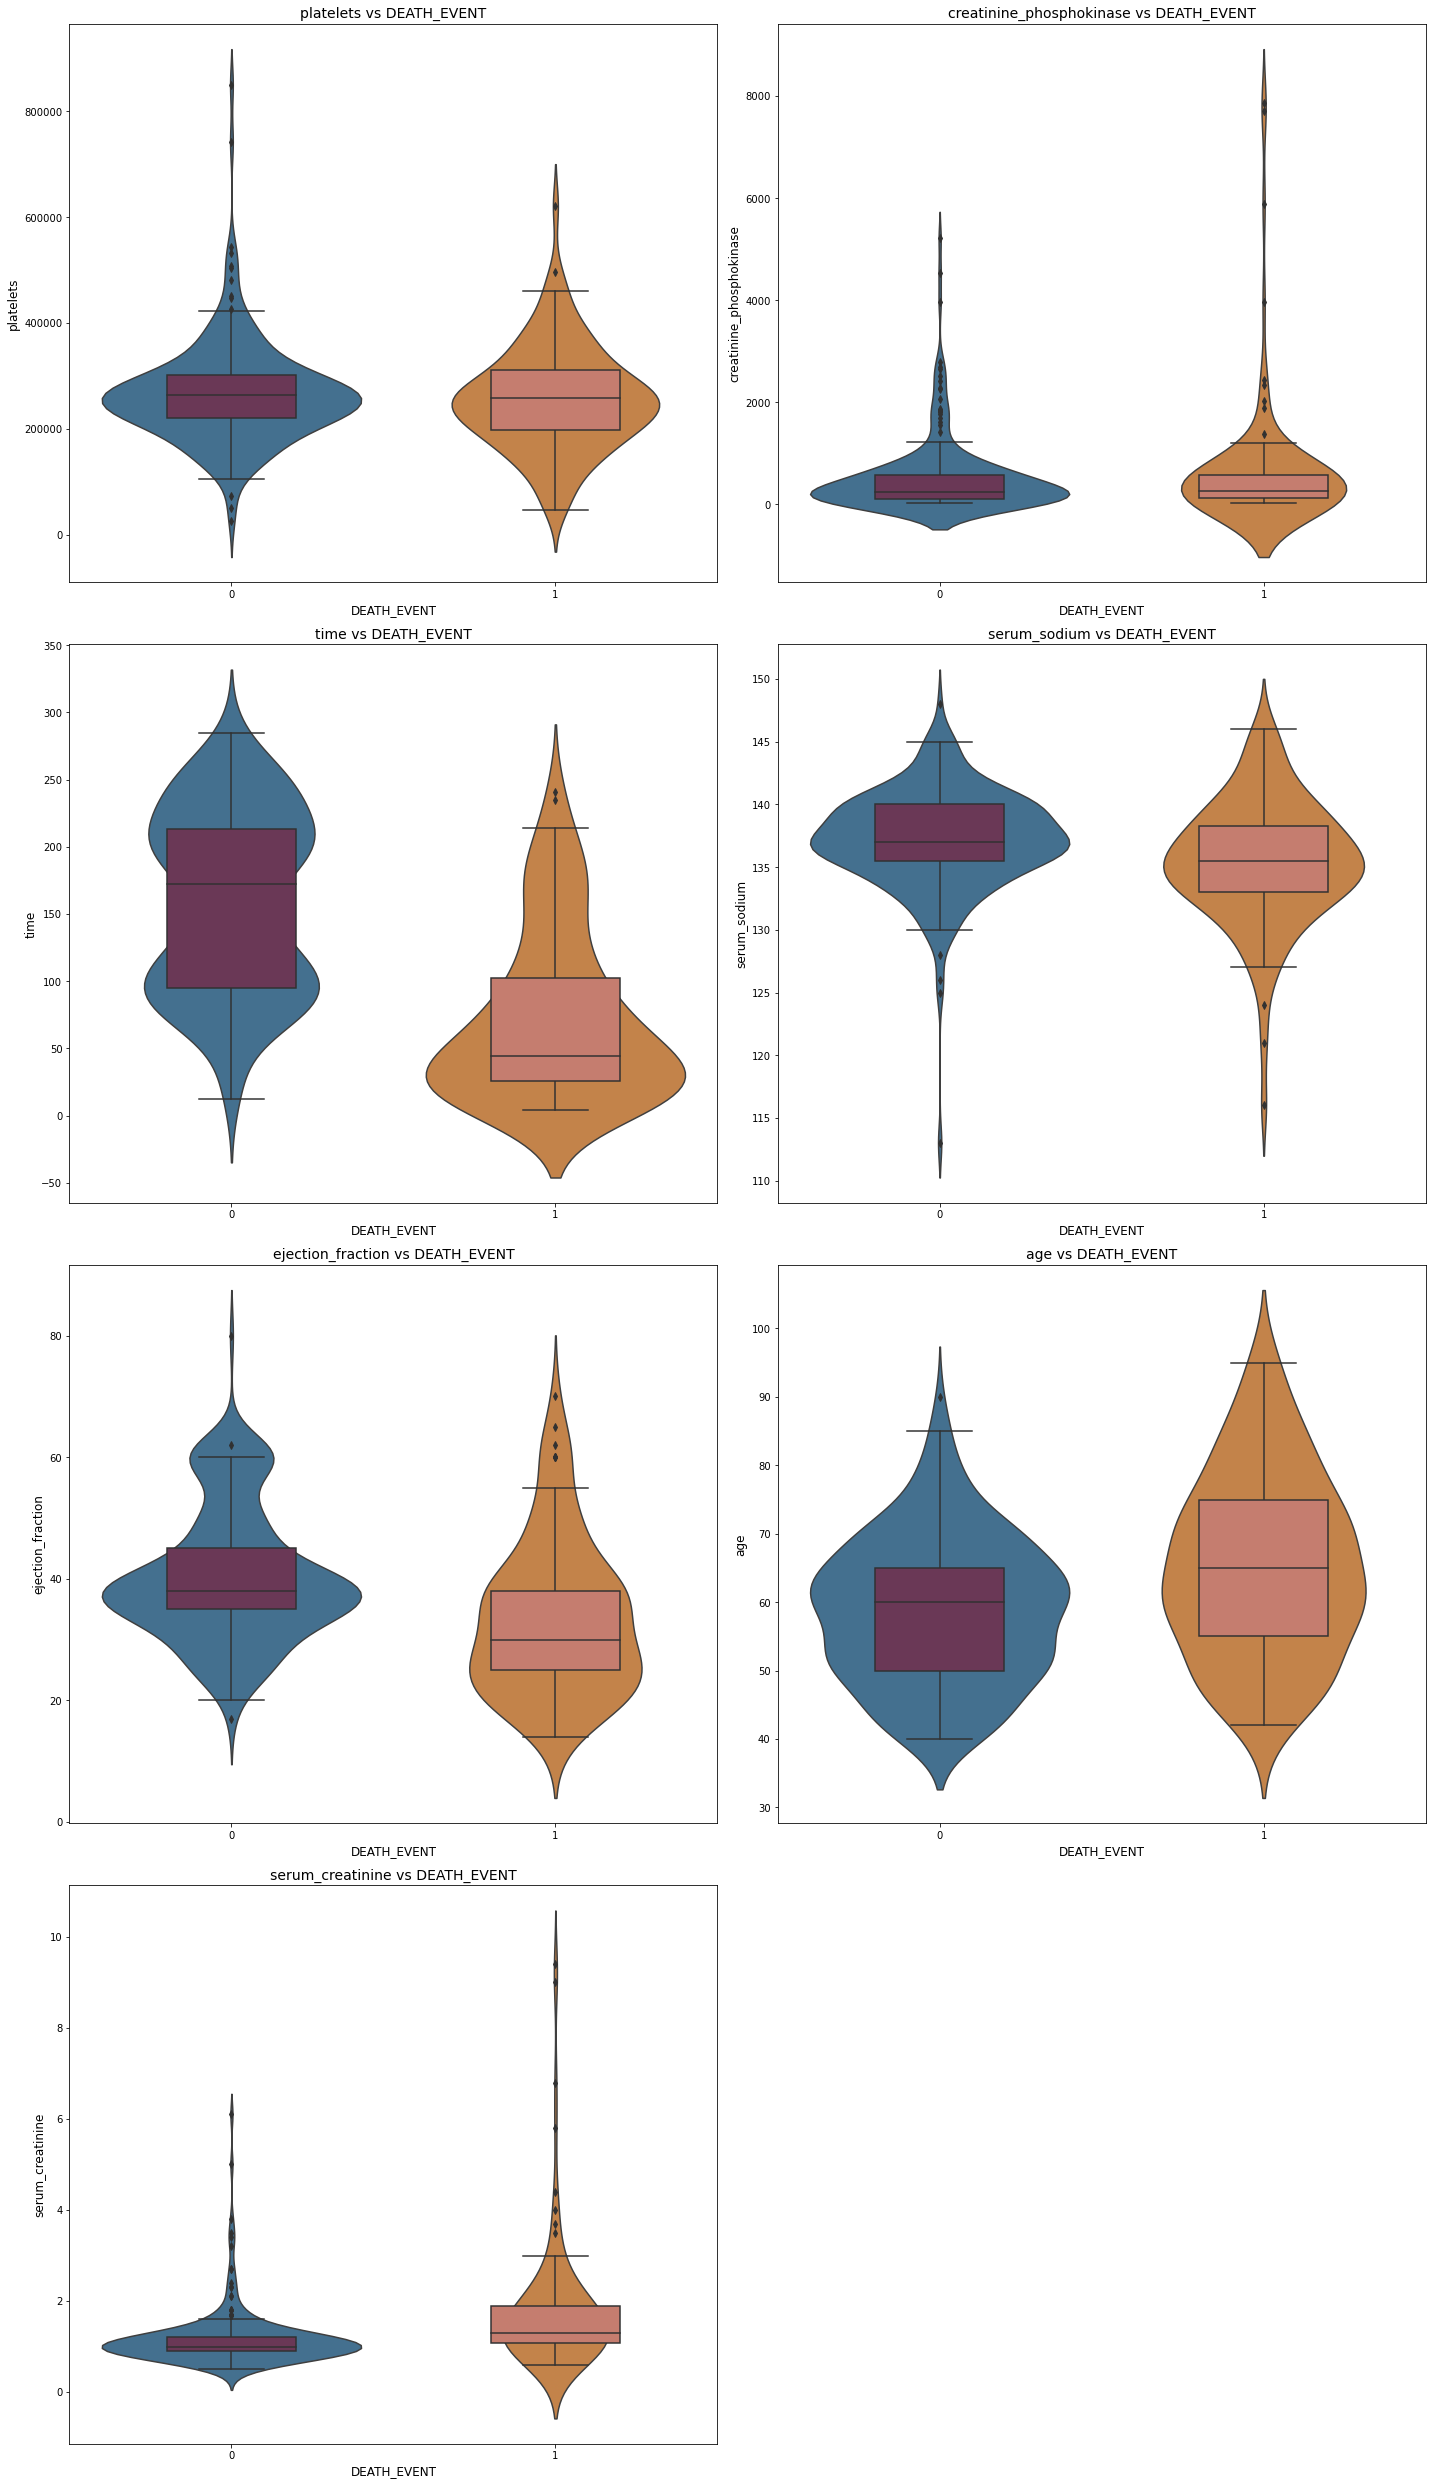

In [ ]:
cats = ['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
cont = list(set(datos.columns) - set(cats))
def distribution_numeric_variables(datos):
    plt.figure(figsize=(20,60))
    for i, num_var in enumerate(cont):
        plt.subplot(7, 2, i + 1)
        ax = sns.violinplot(x= 'DEATH_EVENT', y = num_var, data = datos, inner = None, linewidht = 0, saturation = 0.5)
        sns.boxplot(data=datos, x='DEATH_EVENT', y=num_var, saturation=0.5, width=0.4,
                    palette='rocket', boxprops={'zorder': 2}, ax=ax)
        plt.title(f'{num_var} vs DEATH_EVENT', fontsize=14)
        plt.xlabel('DEATH_EVENT', fontsize=12)
        plt.ylabel(num_var, fontsize=12)
    plt.tight_layout()
    plt.show()
distribution_numeric_variables(datos)

Al analizar las variables se identifica que hay una diferencia significativa entre los pacientes que sobrevivieron y no a la insuficiencia cardiaca. Por ejemplo, los niveles de CPK en la sangre de un paciente que fallecio son mucho mas elevados y estos indican insuficiencia cardíaca, mientras que la cantidad de plaquetas en un paciente que no murío tienen un rango más amplío.

Por otro lado, el tiempo de seguimiento que estuvo un paciente que no fallecio es mayor al que si, para los pacientes que no sobrevivieron la cantidad de días que se encontraban en seguimiento se concentra entre los 0 y 100 días en cambio aquellos que sobrevivieron estuvieron entre 0 y 300 días con una mediana de 180 días aproximadamente.

Teniendo en cuenta que el sodio sirve para el correcto funcionamiento de músculos y nervios y un nivel bajo de este en la sangre podría deberse a una insuficiencia cardíaca, se puede identificar que los pacientes que murieron tienen una mediana ligeramente inferior a los que sobrevivieron, de igual manera los cuartiles son un poco más bajos. Con respecto al porcentaje de sangre que se bombea del corazón con cada latido, aquellos pacientes que no sobrevivieron presentan valores más bajos, en donde su concentración se encuentran entre el 20 y 40%, con una mediana del 30%. Es de mencionar que valores bajos en la fracción de ejección dan indicios de insuficiencia cardiaca.

Otra diferencia se encuentra en la creatinina sérica, en donde valores elevados de este indican insuficiencia cardiaca, al comparar los dos grupos de pacientes, aquellos que fallecieron tienen valores superiores y demasiados son atipicos de creatina sérica. Mientras que para los que sobrevivieron el rango de creatina esta entre 0 y 6 mg/dL, los que murieron se encuentran entre 0 y 11 mg/dL.

Finalmente, la edad para los pacientes que sobreviven se concentra mayormente entre los 40 y 70 años, con un Q1 de 50 y Q3 de 65 años, en cambio para los que fallecieron su edad se concentra entre los 40 y 90 años, con una mediana de 65 años.

Al realizar la comparación entre los dos eventos de muerte, se logra identificar que aquellos que fallecieron presentan niveles más extremos en cada una de las variables, en donde por ejemplo CPK, fracción de ejección y sodio tienen valores inferiores que ya dan indicios de una insuficiencia cardiaca.

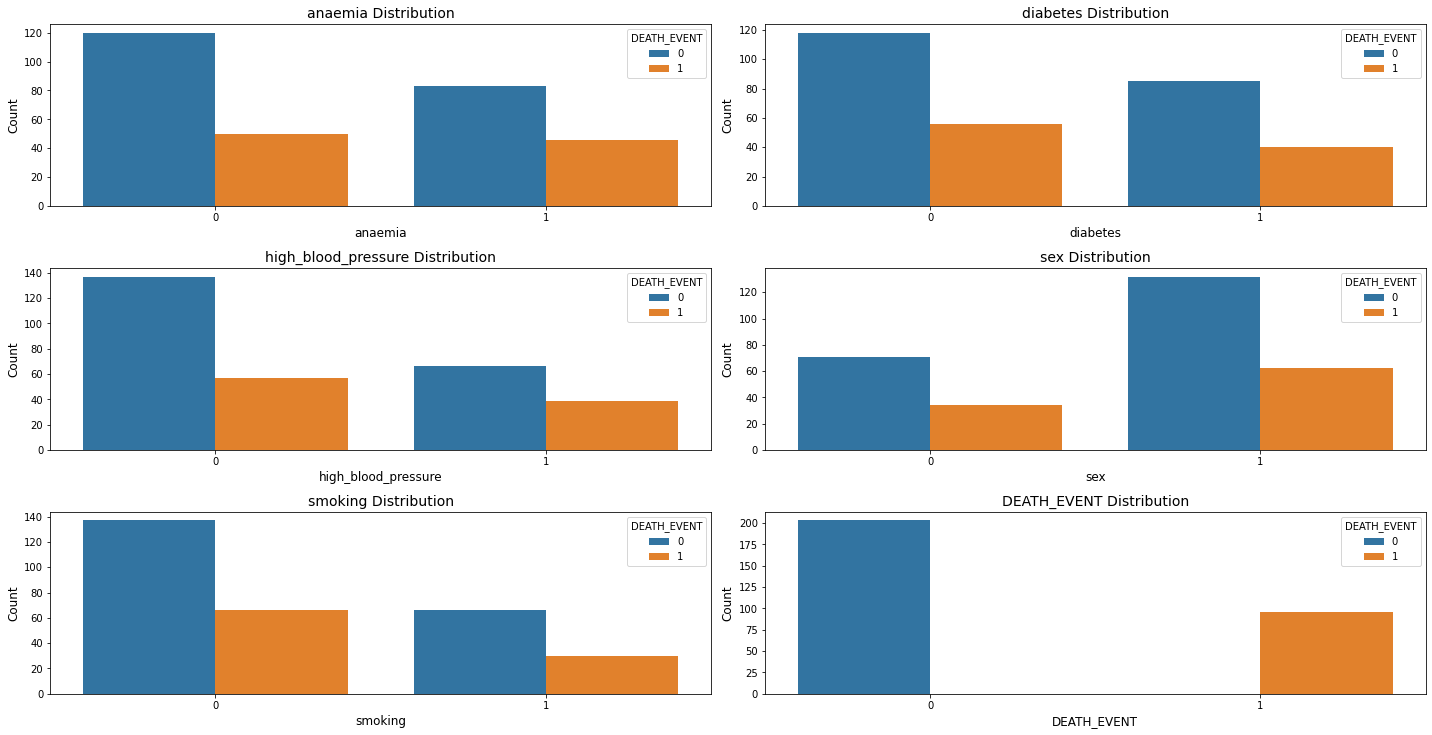

In [ ]:
categorical_vars = datos.loc[:, cats]

def distribution_categorical_variables(datos):
    plt.figure(figsize=(20,20))
    for i, cat_var in enumerate(categorical_vars):
        plt.subplot(6, 2, i + 1)
        sns.barplot(x=cat_var, y='DEATH_EVENT', hue='DEATH_EVENT', data=categorical_vars, estimator=lambda x: len(x))
        plt.title(f'{cat_var} Distribution', fontsize=14)
        plt.xlabel(cat_var, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.legend(title='DEATH_EVENT', loc='upper right')
    plt.tight_layout()
    plt.show()

# Suponiendo que `datos` es tu conjunto de datos
distribution_categorical_variables(datos)

Al comparar la cantidad de pacientes que presentan anemia, para ambos grupos de eventos de muerte aproximadamente 50 pacientes la presentan, no obstante es superior la cantidad de pacientes que no la tienen y sobrevivieron (120). Por otro lado, para que los pacientes que fallecieron 40 tenian diabetes, mientras que para los que sobrevivieron 60 pacientes la tienen, de igual manera es mayor la cantidad de pacientes que sobrevivieron y no tienen diabetes.

La hipertensión la presentaron 40 pacientes que murieron, en cambio 60 no sufrian de hipertensión pero fallecieron. Por otra parte, de aquellos pacientes que fumaban 20 murieron y 60 sobrevivieron, mientras que de los que no fumaban 60 murieron y 130 no. Aproximadamente fallecieron 60 hombres y 30 mujeres.

## 3. Preparación de los datos para poder utilizarlos como entrada para modelos predictivos.
**Se utilizan correctamente los procedimientos de preprocesamiento de datos vistos en el curso para la preparación de los datos antes de la implementación de los modelos predictivos.**

Luego del analisis descriptivo, identificamos que la base no presenta datos faltantes o nulos. Las variables categoricas ya se encuentran definidas como booleanos. Por otro lado, debido a la hetorogenidad de las medidas en las que se encuentran las variables, estas deben ser estandarizadas para su adecuado modelamiento. No se identifica que se deban realizar tratamientos adicionales. Ademas, para utilizar los datos en los modelos predictivos que se vayan a utilizar se necesita dividirlos en dos subconjuntos: El subconjunto de entrenamiento y el subconjunto de prueba.

In [ ]:
YTotal = datos_dm['DEATH_EVENT']
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, YTotal, test_size=0.33, random_state=0)

In [ ]:
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)

### Bibliografía
* Ahmad T, Munir A, Bhatti SH, Aftab M, Raza MA. Survival analysis of heart failure patients: a case study. PLoS ONE. 2017; 12(7):0181001
* Bredy C, Ministeri M, Kempny A, Alonso-Gonzalez R, Swan L, Uebing A, Diller G-P, Gatzoulis MA, Dimopoulos K. New York Heart Association (NYHA) classification in adults with congenital heart disease: relation to objective measures of exercise and outcome. Eur Heart J – Qual Care Clin Outcomes. 2017; 4(1):51–8.